In [1]:
import pandas as pd
import string
import re
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
factors=['санкции', 'цены на энергоресурсы', 'валютный курс', 'дкп', 'доходы','налоги и тарифы', 'неопределённость']

In [3]:
num_with_f=0

In [4]:
def work_with_comments(comments):
    comments['clean_text']=''
    comments['keyword_i']=0
    comments['with_f']=0
    comments['sum_f']=0
    for f in factors:
        comments[f]=0
    i=0
    for i in range (len(comments)):
        c=0
        s=comments.iloc[i]['text']
        s=str(s)
        s=s.lower()
        for p in string.punctuation:
            if p in s:
                s=s.replace(p, '')
        s=s.replace('\n', ' ')
        comments.loc[i,'clean_text']=s
        c=bool(re.search(r'инфляц|цен', s))*bool(re.search(r'выс|выш|рост|раст', s))
        comments.loc[i,'keyword_i']=comments['keyword_i'][i]+c
        i=0
    for i in range (len(comments)):
        s=comments.iloc[i]['clean_text']
        s=str(s)
        
        c=bool(re.search(r'санкц', s))*comments['keyword_i'][i]
        comments.loc[i,'санкции']=comments.iloc[i]['санкции']+c
        comments.loc[i, 'sum_f']=comments.iloc[i]['sum_f']+c
        
        c=bool(re.search(r'нефт|газ|опек|баррель', s))*comments['keyword_i'][i]
        comments.loc[i,'цены на энергоресурсы']=comments.iloc[i]['цены на энергоресурсы']+c
        comments.loc[i, 'sum_f']=comments.iloc[i]['sum_f']+c
        
        c=bool(re.search(r'курс|укреп|ослаб', s))*bool(re.search(r'валют|рубл|евро|доллар', s))*comments['keyword_i'][i]
        comments.loc[i,'валютный курс']=comments.iloc[i]['валютный курс']+c
        comments.loc[i, 'sum_f']=comments.iloc[i]['sum_f']+c
        
        c=bool(re.search(r'ключ|ставк|цб|рефинанс|репо|дкп|денежно-кредитн|центробанк', s))*comments['keyword_i'][i]
        comments.loc[i,'дкп']=comments.iloc[i]['дкп']+c
        comments.loc[i, 'sum_f']=comments.iloc[i]['sum_f']+c
        
        c=bool(re.search(r'заработ|зарп|зп|з/п|пенс|доход', s))*comments['keyword_i'][i]
        comments.loc[i,'доходы']=comments.iloc[i]['доходы']+c
        comments.loc[i, 'sum_f']=comments.iloc[i]['sum_f']+c
        
        c=bool(re.search(r'налог|ндс|ндфл|тариф', s))*comments['keyword_i'][i]
        comments.loc[i,'налоги и тарифы']=comments.iloc[i]['налоги и тарифы']+c
        comments.loc[i, 'sum_f']=comments.iloc[i]['sum_f']+c
        
        c=bool(re.search(r'неопред|непонят|нестабильн|неуверен|неизв|непредск|неустойч|неясн', s))*comments['keyword_i'][i]
        comments.loc[i,'неопределённость']=comments.iloc[i]['неопределённость']+c
        comments.loc[i, 'sum_f']=comments.iloc[i]['sum_f']+c
        
        if comments['sum_f'][i]>0: comments['with_f']=comments['with_f']+1
        
    return comments

In [5]:
def work_with_df(comments, df):
    for i in range(len(comments)):
        if comments['comment_time'][i]<1672531200:
            df.loc[comments['comment_time'][i]//86400, 'sum_f']=df['sum_f'][comments['comment_time'][i]//86400]+comments['sum_f'][i]
            for f in factors:
                df.loc[comments['comment_time'][i]//86400, f]=df[f][comments['comment_time'][i]//86400]+comments[f][i]
    return df

In [6]:
df=pd.DataFrame()
df['date_num']=list(range(18871, 19358, 1))
df['date']=pd.date_range('2021-09-01', '2022-12-31')
df=df.set_index('date_num')
df['sum_f']=0
for f in factors:
    df[f]=0

# Коммерсант

In [7]:
comments=pd.read_csv('kommersant_comments.csv')
comments=work_with_comments(comments)
df=work_with_df(comments, df)
num_with_f=num_with_f+comments['with_f'][0]

# Ведомости

In [8]:
comments=pd.read_csv('vedomosti_comments.csv')
comments=work_with_comments(comments)
df=work_with_df(comments, df)
num_with_f=num_with_f+comments['with_f'][0]

# Эксперт

In [9]:
comments=pd.read_csv('expert_comments.csv')
comments=work_with_comments(comments)
df=work_with_df(comments, df)
num_with_f=num_with_f+comments['with_f'][0]

# ТАСС

In [10]:
comments=pd.read_csv('tass_comments.csv')
comments=work_with_comments(comments)
df=work_with_df(comments, df)
num_with_f=num_with_f+comments['with_f'][0]

# Московский комсомолец

In [11]:
comments=pd.read_csv('mk_comments.csv')
comments=work_with_comments(comments)
df=work_with_df(comments, df)
num_with_f=num_with_f+comments['with_f'][0]

# Комсомольская правда

In [12]:
comments=pd.read_csv('kp_comments.csv')
comments=work_with_comments(comments)
df=work_with_df(comments, df)
num_with_f=num_with_f+comments['with_f'][0]

# Аргументы и факты

In [13]:
comments=pd.read_csv('aif_comments.csv')
comments=work_with_comments(comments)
df=work_with_df(comments, df)
num_with_f=num_with_f+comments['with_f'][0]

# Известия

In [14]:
comments=pd.read_csv('iz_comments.csv')
comments=work_with_comments(comments)
df=work_with_df(comments, df)
num_with_f=num_with_f+comments['with_f'][0]

# Вести

In [15]:
comments=pd.read_csv('vesti_comments.csv')
comments=work_with_comments(comments)
df=work_with_df(comments, df)
num_with_f=num_with_f+comments['with_f'][0]

# Life.ru

In [16]:
comments=pd.read_csv('life_comments.csv')
comments=work_with_comments(comments)
df=work_with_df(comments, df)
num_with_f=num_with_f+comments['with_f'][0]

# Индикатор

In [17]:
df

,date,sum_f,санкции,цены на энергоресурсы,валютный курс,дкп,доходы,налоги и тарифы,неопределённость
date_num,,,,,,,,,
18871,2021-09-01,1,0,1,0,0,0,0,0
18872,2021-09-02,0,0,0,0,0,0,0,0
18873,2021-09-03,0,0,0,0,0,0,0,0
18874,2021-09-04,0,0,0,0,0,0,0,0
18875,2021-09-05,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19353,2022-12-27,1,1,0,0,0,0,0,0
19354,2022-12-28,1,0,0,1,0,0,0,0
19355,2022-12-29,3,0,2,0,0,1,0,0


In [18]:
indicator=pd.DataFrame()
indicator['date']=pd.date_range('2021-09-01', '2022-12-31')
for i in range(len(df)):
    for f in factors:
        indicator.loc[i,f]=df[f][i+18871]/df['sum_f'][i+18871]

In [19]:
indicator

,date,санкции,цены на энергоресурсы,валютный курс,дкп,доходы,налоги и тарифы,неопределённость
0,2021-09-01,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
1,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
482,2022-12-27,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0
483,2022-12-28,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0
484,2022-12-29,0.0,0.666667,0.0,0.0,0.333333,0.0,0.0
485,2022-12-30,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0


In [20]:
import matplotlib
from matplotlib import pyplot as plt

In [22]:
indicator_month=pd.DataFrame()
indicator_month['date']=['2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12']
indicator_month['sum_i']=0
indicator_month['n']=0
indicator_month=indicator_month.set_index('date')
indicator_month['date']=indicator_month.index
indicator_month

,sum_i,n,date
date,,,
2021-09,0,0,2021-09
2021-10,0,0,2021-10
2021-11,0,0,2021-11
2021-12,0,0,2021-12
2022-01,0,0,2022-01
2022-02,0,0,2022-02
2022-03,0,0,2022-03
2022-04,0,0,2022-04
2022-05,0,0,2022-05


In [23]:
import math

In [25]:
for f in factors:   
    indicator_month['sum_i']=0
    indicator_month['n']=0
    i=0
    for i in range (len(df)):
        if math.isnan(indicator[f][i])==False and math.isinf(indicator[f][i])==False:
            indicator_month.loc[str(indicator['date'][i])[:7],'sum_i']=indicator_month['sum_i'][str(indicator['date'][i])[:7]]+indicator[f][i]
            indicator_month.loc[str(indicator['date'][i])[:7],'n']=indicator_month['n'][str(indicator['date'][i])[:7]]+1
    indicator_month[f]=indicator_month['sum_i']/indicator_month['n']
    

In [72]:
indicator_month['санкции']=indicator_month['sum_i']/indicator_month['n']

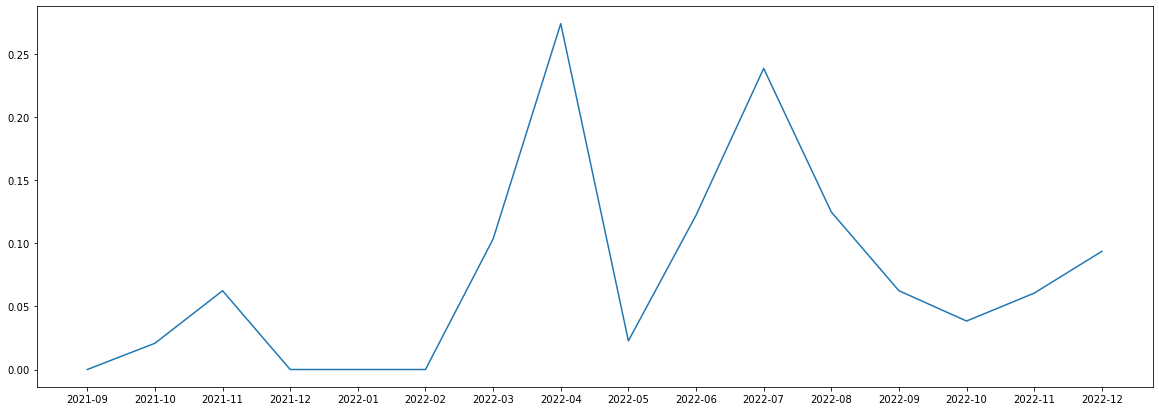

In [26]:
plt.figure(figsize=(20, 7))
plt.plot(indicator_month['санкции'])

In [30]:
indicator_month

,sum_i,n,date,санкции,цены на энергоресурсы,валютный курс,дкп,доходы,налоги и тарифы,неопределённость
date,,,,,,,,,,
2021-09,0.0000,8,2021-09,0.000000,0.229167,0.000000,0.125000,0.458333,0.187500,0.000000
2021-10,0.0000,12,2021-10,0.020833,0.266667,0.155556,0.213889,0.298611,0.044444,0.000000
2021-11,0.0000,16,2021-11,0.062500,0.083333,0.000000,0.292708,0.411458,0.150000,0.000000
2021-12,0.2000,19,2021-12,0.000000,0.124561,0.052632,0.251754,0.475439,0.085088,0.010526
2022-01,0.0000,8,2022-01,0.000000,0.187500,0.000000,0.104167,0.500000,0.208333,0.000000
2022-02,0.0000,5,2022-02,0.000000,0.000000,0.200000,0.500000,0.300000,0.000000,0.000000
2022-03,0.1000,14,2022-03,0.103571,0.311905,0.028571,0.122619,0.352381,0.073810,0.007143
2022-04,0.0625,14,2022-04,0.274490,0.215051,0.046811,0.229847,0.176276,0.053061,0.004464
2022-05,0.7500,11,2022-05,0.022727,0.389610,0.043290,0.058442,0.417749,0.000000,0.068182


In [31]:
indicator_month.to_csv('indicator_f.csv', index=False)